In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
df=pd.read_csv("wdbc.data")
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_point1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Data cleaning

In [12]:
df=df.drop(["ID"],axis=1)
df["Diagnosis"]=(df["Diagnosis"]=="M").astype(int)
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_point1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


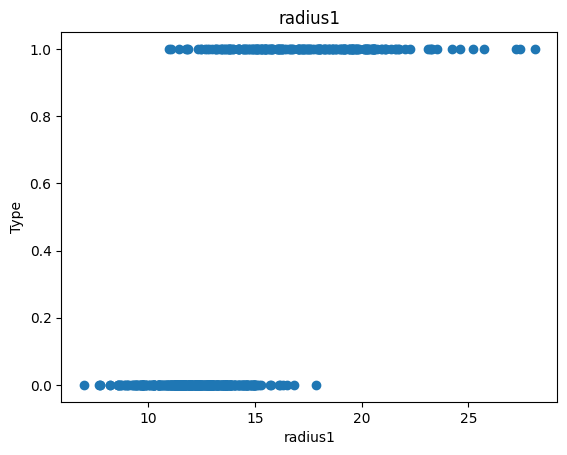

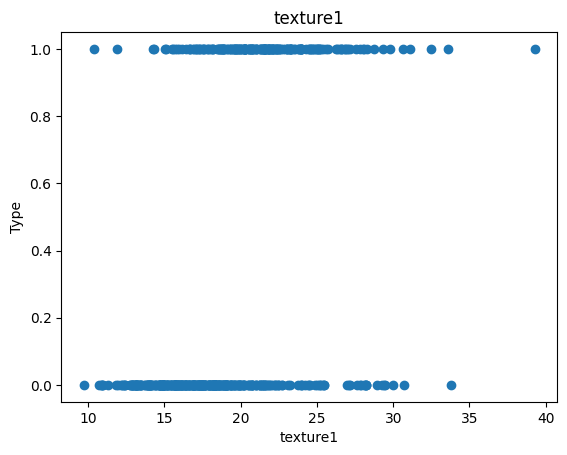

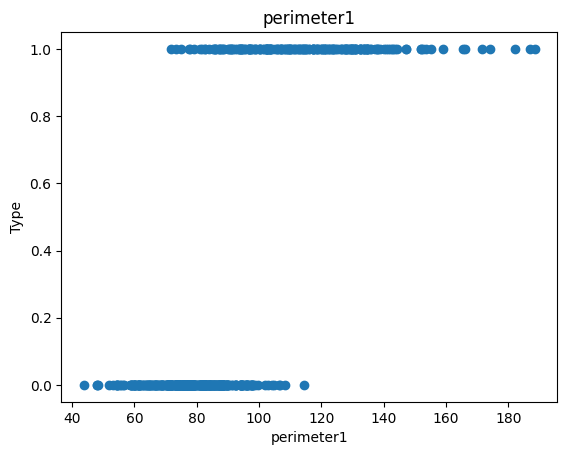

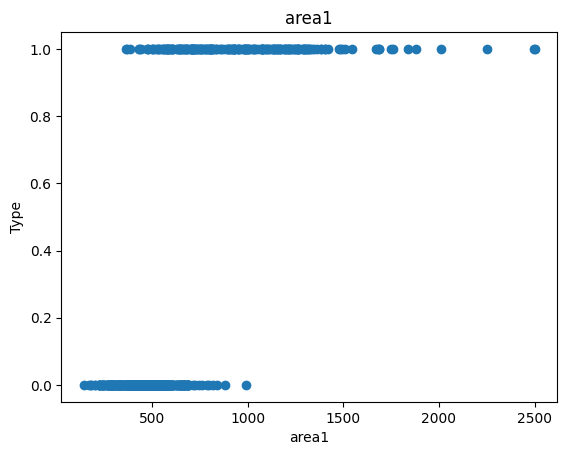

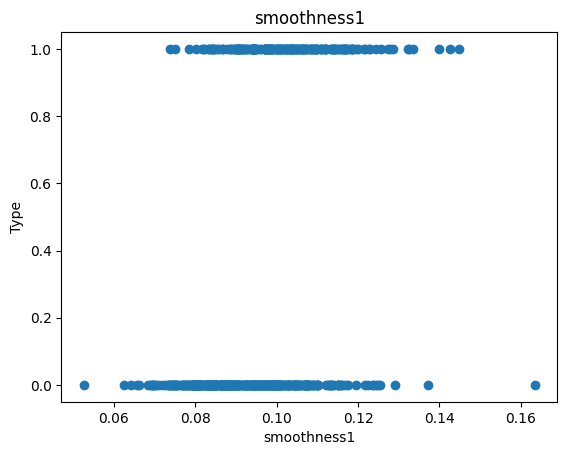

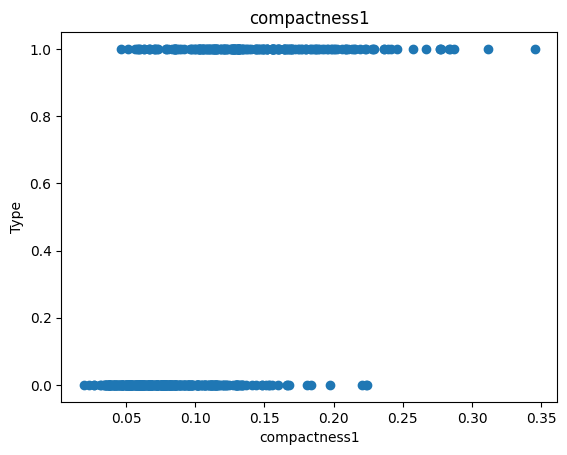

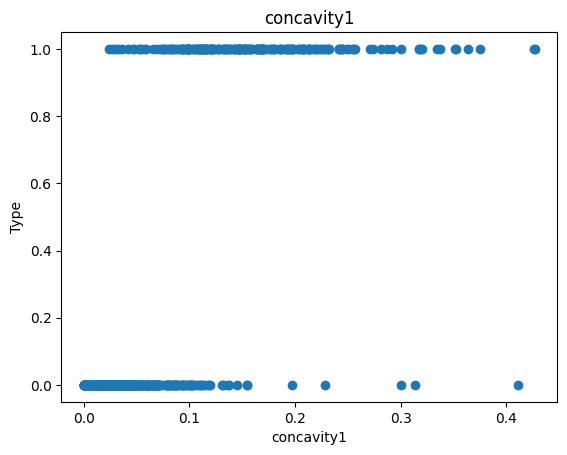

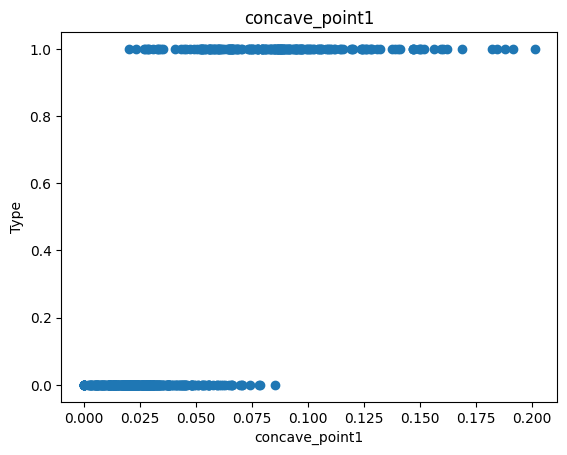

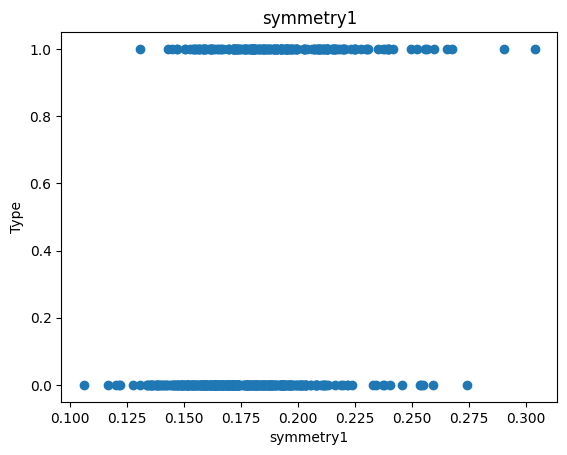

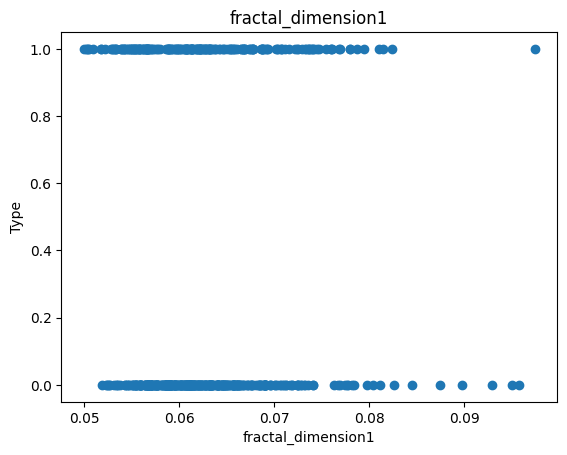

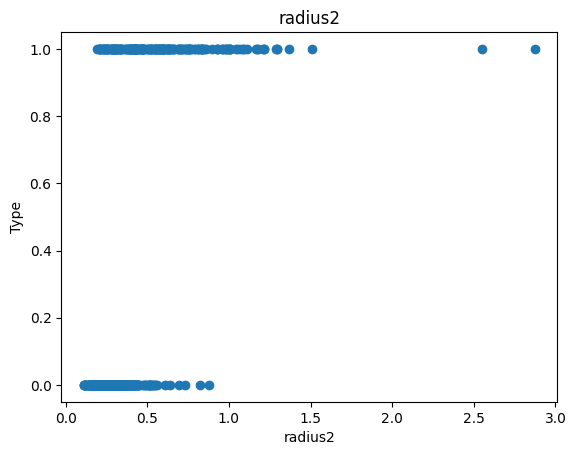

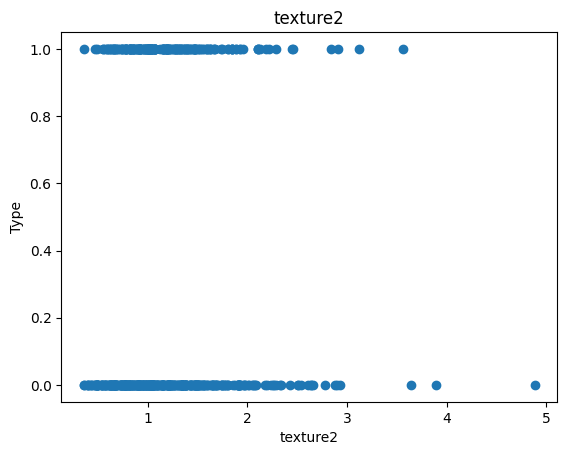

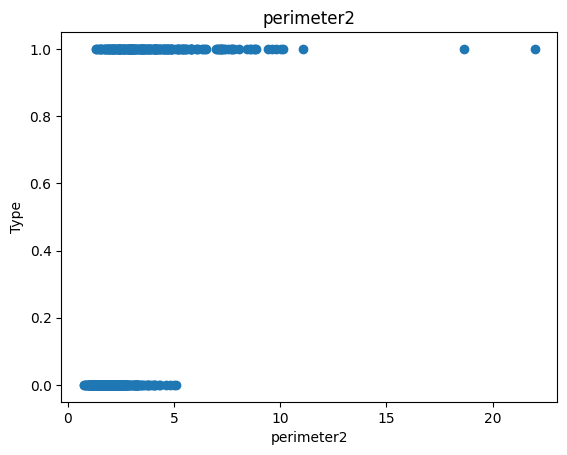

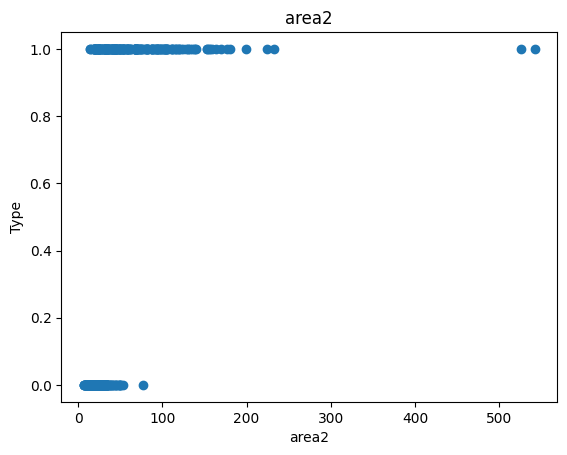

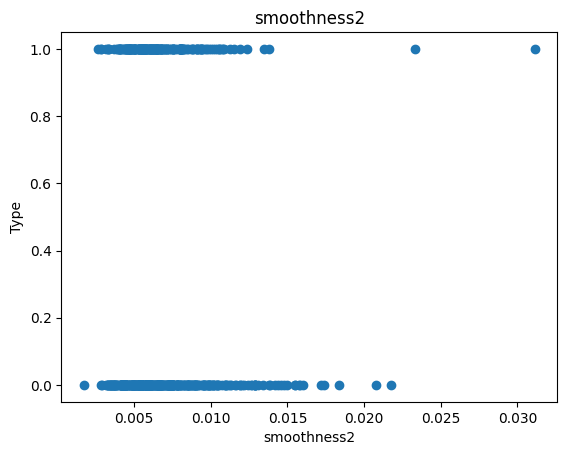

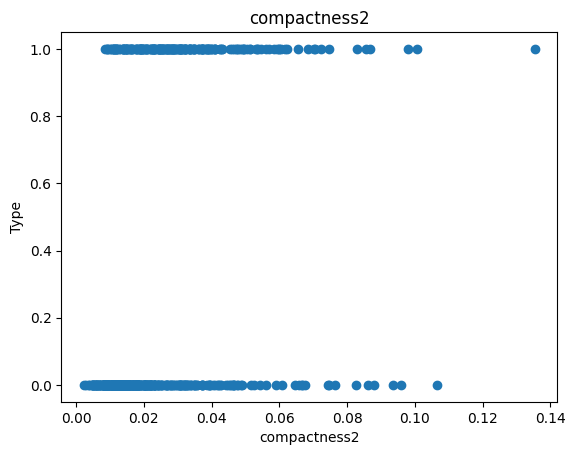

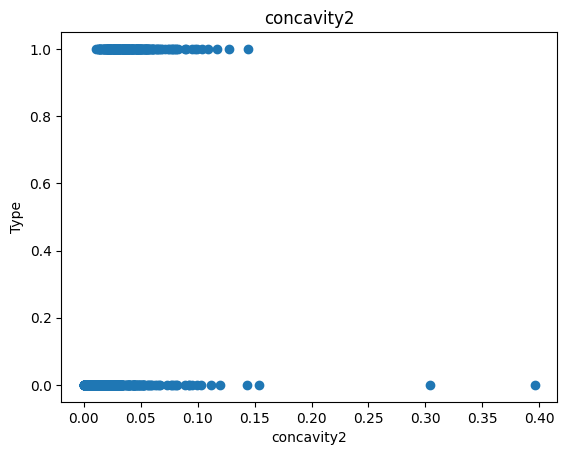

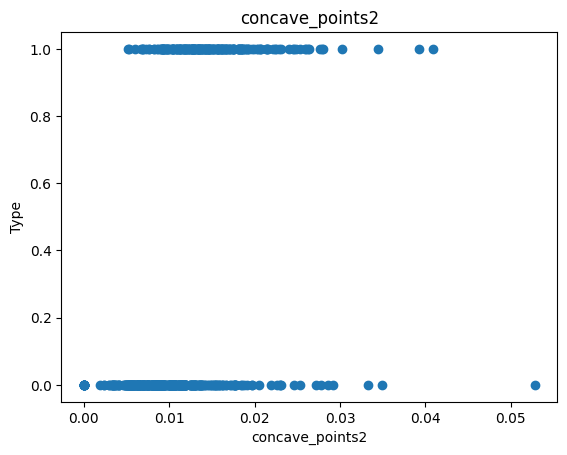

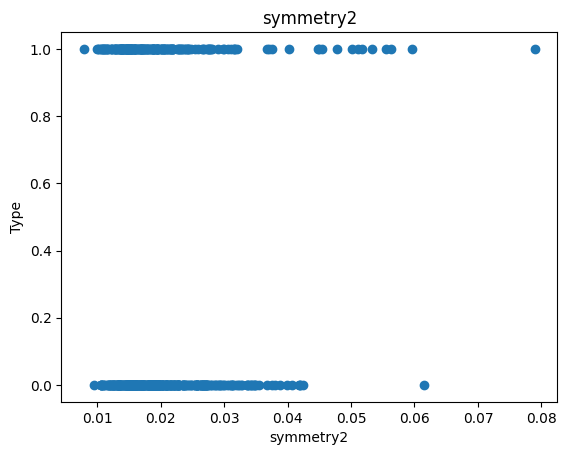

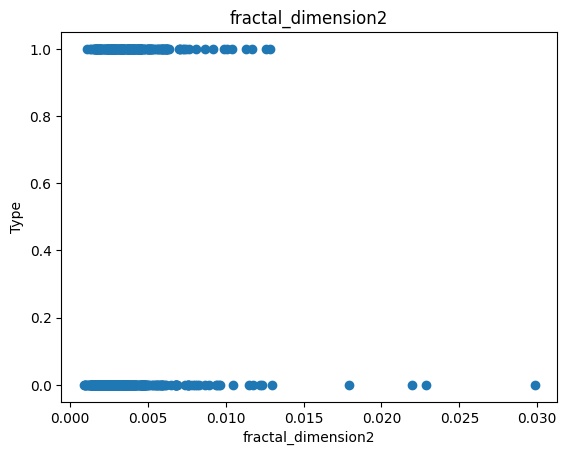

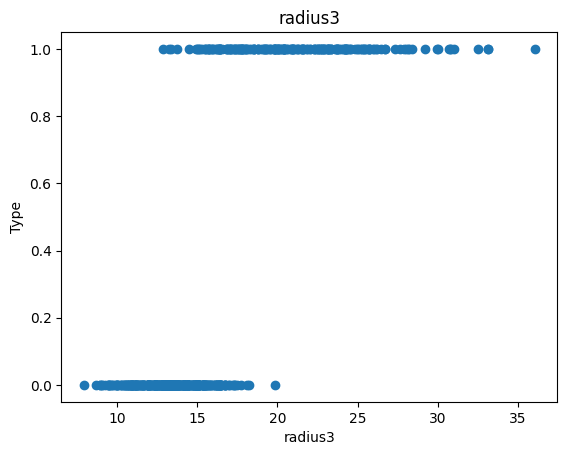

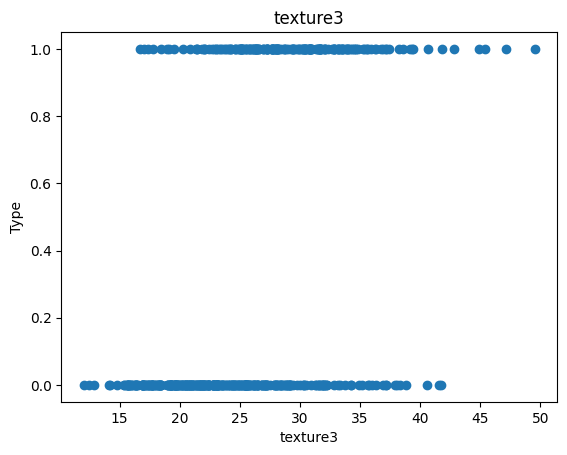

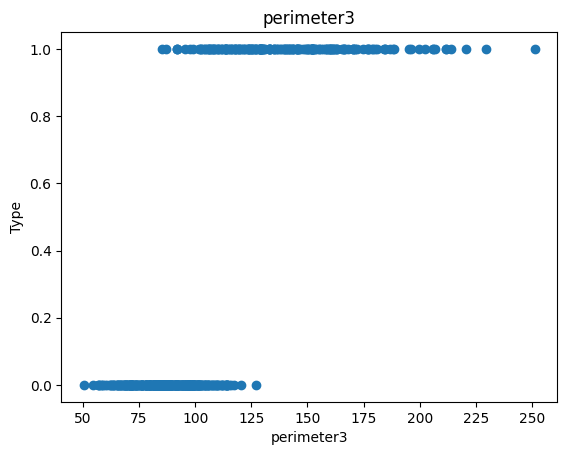

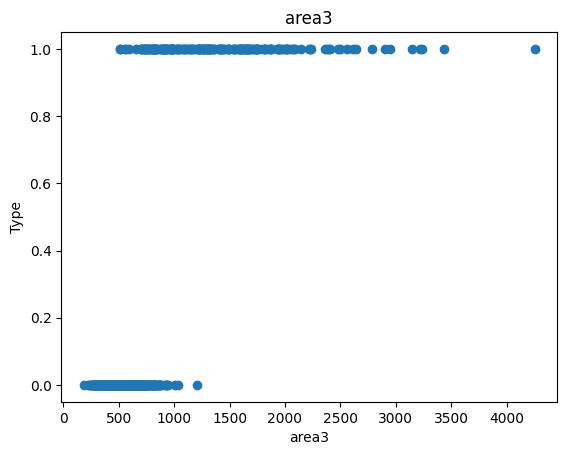

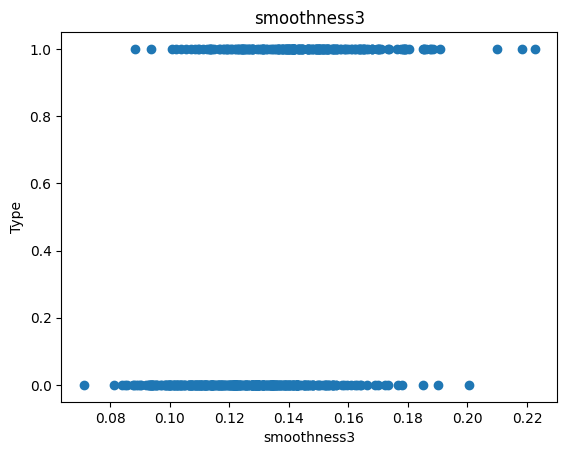

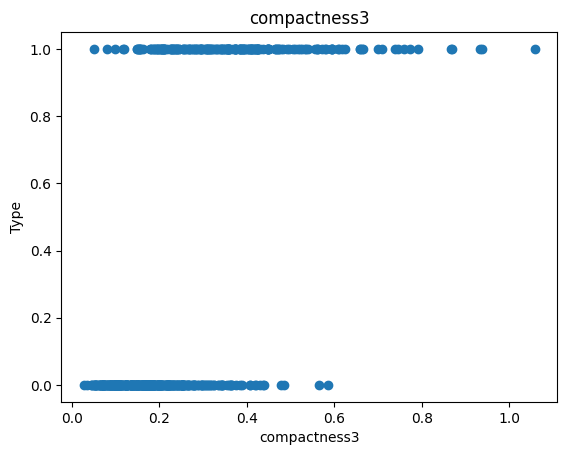

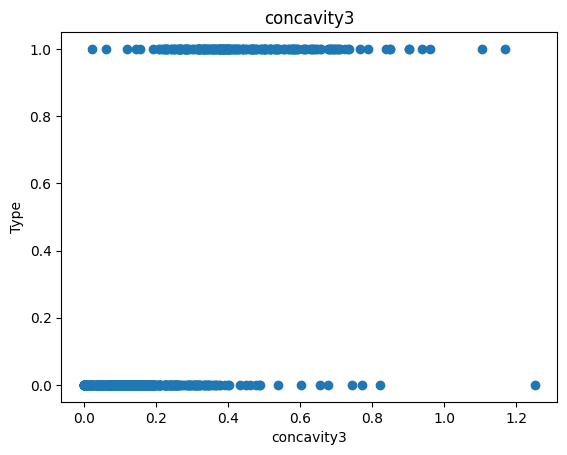

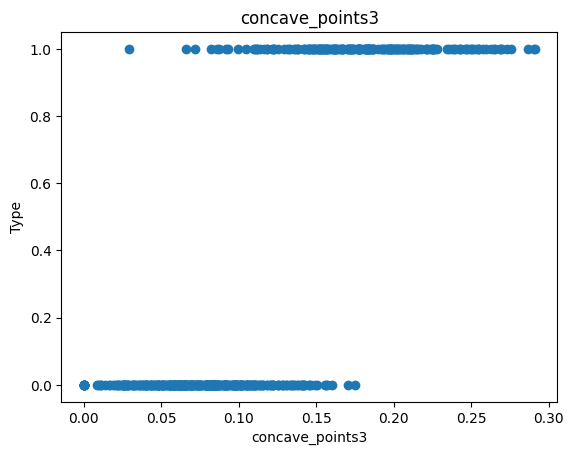

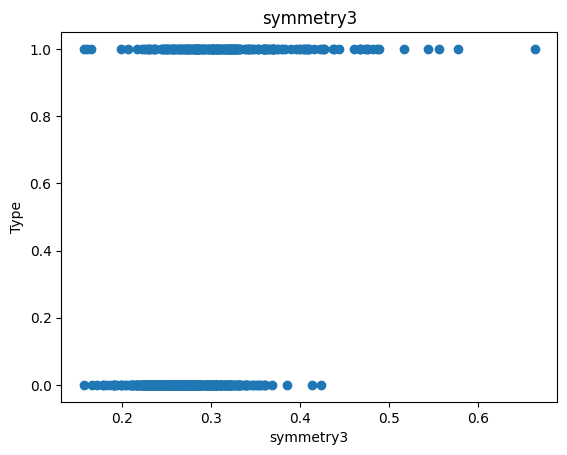

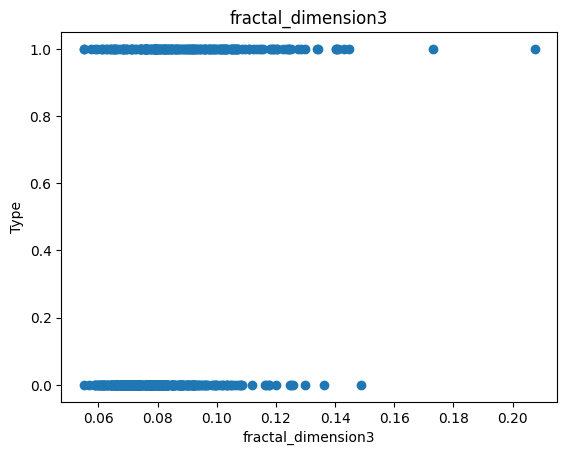

In [14]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["Diagnosis"])
  plt.title(label)
  plt.ylabel("Type")
  plt.xlabel(label)
  plt.show()

#Manual implementation

In [5]:
def gradient_descent(X, y, learning_rate=0.01, n_iter=1000):    #return the coeff of the function that modelize the target
  n = len(y)

  X = np.array(X)
  y = np.array(y)

  X_bias = np.column_stack([np.ones(n), X]) #each row represent the xj of the cost function formula
  n_features = X_bias.shape[1] #number of xj
  theta = np.zeros(n_features) #random initialisation of the coefficients
  y_preds = np.zeros(n)
  losses = []

  for _ in range(n_iter):
    z = X_bias @ theta
    y_preds = y_pred(z)

    loss = -(y * np.log(y_preds + 1e-10) + (1 - y) * np.log(1 - y_preds + 1e-10)).mean()  #adding the 1e-10 to preven the log from diverging to -infinity, it has no real impact in practice, it stays close to the real value
    losses.append(loss)

    grad = (1/n) * X_bias.T @ (y_preds - y)
    theta -= learning_rate*grad

  return theta,losses


def y_pred(z):     #compute the prediction corespondant to the X features
  return 1/(1+np.exp(-z))



def split_data(df,target_name): # take the whole df and target's name and return the split data in an adapted form for the gradient_descent function
  df=copy.deepcopy(df)

  train, val = np.split(df.sample(frac=1),[int(0.8*len(df))]) #split at 0.6 of the df lenght and 0.8 of the df lenght

  df_1=train.drop([target_name],axis=1)
  X_train = df_1.values.tolist()         #list of list of the features for train
  y_train = train[target_name].tolist()   #list of target for train

  df_2=val.drop([target_name],axis=1)
  X_val = df_2.values.tolist()          #list of list of the features for val
  y_val = val[target_name].tolist()    #list of target for val

  #df_3=test.drop([target_name],axis=1)
  #X_test = df_3.values.tolist()          #list of list of the features for test
  #y_test = test[target_name].tolist()    #list of target for test

  return X_train,y_train,X_val,y_val

def scale_features(X):    #normalize features to avoid the gradient to diverge
    X = np.array(X)
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    return (X - means) / stds

def classify(y_preds):           #classify the predictions as 1 if the tumor is more likely to be malignant or as 0 if it is more likely to be benign
  for i in range(len(y_preds)):
    if y_preds[i]>0.5:
      y_preds[i]=1
    else:
      y_preds[i]=0
  return y_preds

def predict(X, theta):
    X = np.column_stack([np.ones(X.shape[0]), X])
    return y_pred(X @ theta)

def Linear_Regression(df,target_name,learning_rate,n_iter):      #return the coeff of the function
  X_train_1,y_train_1,X_val_1,y_val_1 = split_data(df,target_name)
  X_train,y_train,X_val,y_val = scale_features(X_train_1),y_train_1,scale_features(X_val_1),y_val_1

  theta=[]
  losses=[]
  theta,losses = gradient_descent(X_train, y_train, learning_rate, n_iter)

  X_val = np.array(X_val)
  y_val = np.array(y_val)
  y_preds = classify(predict(X_val,theta))

  p = 0
  for i in range(len(y_val)):
    if y_val[i]==y_preds[i]:
      p=p+1
  accuracy=p/(len(y_val))

  return theta,losses,accuracy


#Results

In [ ]:
theta,losses,accuracy = Linear_Regression(df,"Diagnosis",0.01,10000)
print(theta)
print(accuracy)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[-0.26827584  0.49683803  0.65457423  0.49034217  0.53018131  0.14745504
 -0.21126989  0.57912009  0.61361665  0.08315668 -0.45441682  0.82982956
 -0.19723251  0.61601385  0.76013234  0.14246223 -0.5468617  -0.05873667
  0.16890259 -0.25685045 -0.44886907  0.78651263  0.93924384  0.73256976
  0.75415038  0.83060977  0.17325864  0.73423774  0.83965633  0.69014456
  0.29470378]
0.9824561403508771


#Implementation with libraries

In [6]:
X_train_1,y_train_1,X_val_1,y_val_1 = split_data(df,"Diagnosis")
X_train,y_train,X_val,y_val = scale_features(X_train_1),y_train_1,scale_features(X_val_1),y_val_1


lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


#Results

In [7]:
y_pred = lg_model.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.90      0.92      0.91        38

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [10]:
df.to_csv('sample_data/cancer_clean.csv', index=False)
df_1 = pd.read_csv('sample_data/cancer_clean.csv', sep=',', encoding='latin-1')
df_1.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_point1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
